In [18]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score
from sklearn.model_selection import GridSearchCV

In [19]:
df = pd.read_csv('fake_job_postings.csv')
df.columns #names of columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent'],
      dtype='object')

In [20]:
df.shape #size of dataset

(17880, 18)

In [21]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [22]:
df.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [23]:
cat_columns = df.columns[df.dtypes == object]
df[cat_columns] = df[cat_columns].fillna('Empty')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,Empty,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,Empty,0,1,0,Other,Internship,Empty,Empty,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Empty,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,Empty,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Empty,Empty,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,Empty,0,1,0,Empty,Empty,Empty,Empty,Empty,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,Empty,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",Empty,Empty,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
5,6,Accounting Clerk,"US, MD,",Empty,Empty,Empty,Job OverviewApex is an environmental consultin...,Empty,Empty,0,0,0,Empty,Empty,Empty,Empty,Empty,0
6,7,Head of Content (m/f),"DE, BE, Berlin",ANDROIDPIT,20000-28000,"Founded in 2009, the Fonpit AG rose with its i...",Your Responsibilities: Manage the English-spea...,Your Know-How: ...,Your Benefits: Being part of a fast-growing co...,0,1,1,Full-time,Mid-Senior level,Master's Degree,Online Media,Management,0
7,8,Lead Guest Service Specialist,"US, CA, San Francisco",Empty,Empty,Airenvy’s mission is to provide lucrative yet ...,Who is Airenvy?Hey there! We are seasoned entr...,"Experience with CRM software, live chat, and p...",Competitive Pay. You'll be able to eat steak e...,0,1,1,Empty,Empty,Empty,Empty,Empty,0
8,9,HP BSM SME,"US, FL, Pensacola",Empty,Empty,Solutions3 is a woman-owned small business who...,Implementation/Configuration/Testing/Training ...,MUST BE A US CITIZEN.An active TS/SCI clearanc...,Empty,0,1,1,Full-time,Associate,Empty,Information Technology and Services,Empty,0
9,10,Customer Service Associate - Part Time,"US, AZ, Phoenix",Empty,Empty,"Novitex Enterprise Solutions, formerly Pitney ...",The Customer Service Associate will be based i...,Minimum Requirements:Minimum of 6 months custo...,Empty,0,1,0,Part-time,Entry level,High School or equivalent,Financial Services,Customer Service,0


In [24]:
X = df.drop("fraudulent",axis=1)
y = df.fraudulent
y = y.astype('int')




In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
clf = ColumnTransformer([("one_hot", one_hot, cat_columns)], remainder="passthrough")
X_fin=clf.fit_transform(X)
np.array(X_fin)


array(<17880x51439 sparse matrix of type '<class 'numpy.float64'>'
	with 274099 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [37]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
y = df['fraudulent']
#df.drop(labels=['title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', , 'employment_type', 'required_experience', 'required_education', 'industry', 'function'], axis=1)
features = ['telecommuting', 'has_company_logo', 'has_questions']

X = df[features]
pca_2 = PCA(2).fit(X)

X_pca = pca_2.transform(X)
X_tsne = TSNE(n_components=2, learning_rate = 200.0, init = 'pca').fit_transform(X)



#df_cluster = df.copy()
#pca_2 = PCA(2)
#pca_2_result = pca_2.fit_transform(df_cluster)

c:\python 3.7\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


Text(0.5, 1.0, 'TSNE plot')

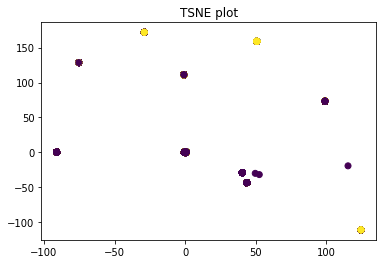

In [71]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.title('PCA plot')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.title('TSNE plot')

In [60]:
# import the necessary packages
from sklearn.cluster import MiniBatchKMeans
import numpy as np
import argparse
import cv2

# load the image and grab its width and height
image = cv2.imread("Leopard-Download-PNG.png")
(h, w) = image.shape[:2]

image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

image = image.reshape((image.shape[0] * image.shape[1], 3))

clt = MiniBatchKMeans(n_clusters = 3)
labels = clt.fit_predict(image)
quant = clt.cluster_centers_.astype("uint8")[labels]

quant = quant.reshape((h, w, 3))
image = image.reshape((h, w, 3))

quant = cv2.cvtColor(quant, cv2.COLOR_LAB2BGR)
image = cv2.cvtColor(image, cv2.COLOR_LAB2BGR)

cv2.imshow("image", np.hstack([image, quant]))

[[0.96078431 0.88627451 0.65882353]
 [0.57254902 0.54901961 0.56470588]
 [1.         1.         1.        ]
 ...
 [0.97254902 0.94509804 0.88235294]
 [1.         1.         1.        ]
 [1.         1.         1.        ]]
Результат кластера: \ n [43 43 43 ... 43 43 43]
Центр кластеров: \ n [[0.19677047 0.1716263  0.15824683]
 [0.99372549 0.97960784 0.97176471]
 [0.59019608 0.52385621 0.44215686]
 [0.78941176 0.72627451 0.64784314]
 [0.87908497 0.8120915  0.71470588]
 [0.59041394 0.39259259 0.24270153]
 [0.71101056 0.63438914 0.50015083]
 [0.01675579 0.00748663 0.00891266]
 [0.26078431 0.22984749 0.23376906]
 [0.5872549  0.55465686 0.55220588]
 [0.34117647 0.30143791 0.30509804]
 [0.96366013 0.94196078 0.92653595]
 [0.84627451 0.71137255 0.35607843]
 [0.71882353 0.57215686 0.30627451]
 [0.42352941 0.38645276 0.38181818]
 [0.31938998 0.2130719  0.10283224]
 [0.70091503 0.6627451  0.66065359]
 [0.97932264 0.92049911 0.85882353]
 [0.51260504 0.41932773 0.27843137]
 [0.14733894 0.06442577 0

In [186]:

def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, 3))
    index = 0
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[index]]
            index += 1
    return image

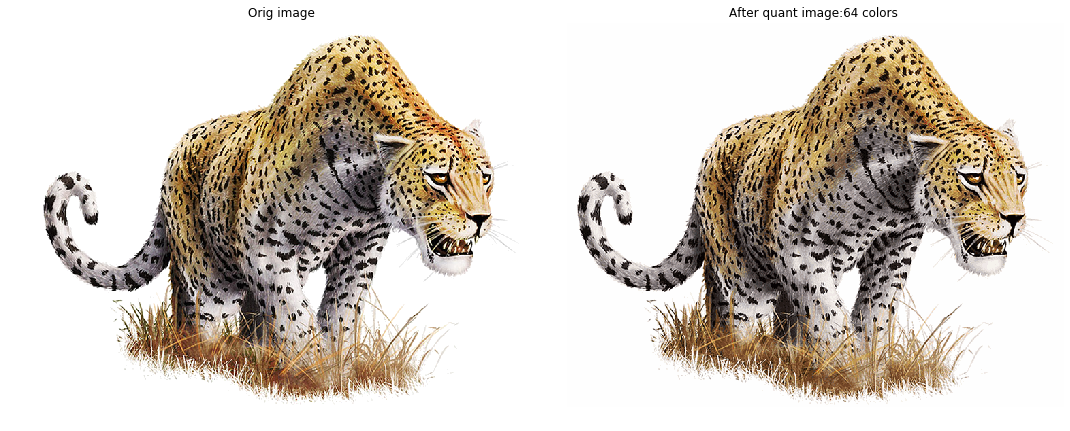

In [191]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt
num_vq = 64
im = Image.open('Leopard-Download-PNG.png') 
image = np.array(im).astype(np.float) / 255
image = image [:,:,: 3] 
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)


N = image_v.shape [0] 
    
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]

model.fit(image_sample)
c = model.predict (image_v)

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title ('Orig image')
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title ('After quant image:%d colors '% num_vq)
plt.imshow(vq_image)
plt.tight_layout(1.2)
plt.show()



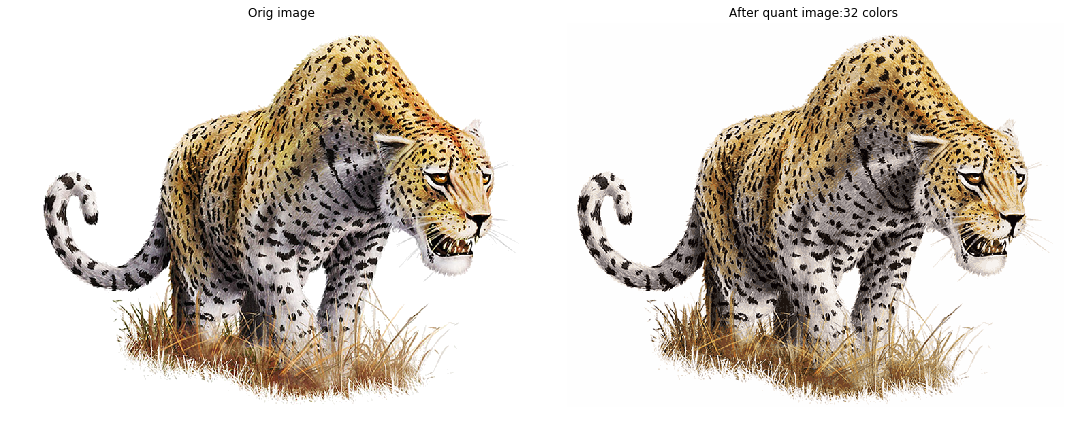

In [192]:
num_vq = 32

image = np.array(im).astype(np.float) / 255
image = image [:,:,: 3] 
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)


N = image_v.shape [0] 
    
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]

model.fit(image_sample)
c = model.predict (image_v)

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title ('Orig image')
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title ('After quant image:%d colors '% num_vq)
plt.imshow(vq_image)
plt.tight_layout(1.2)
plt.show()

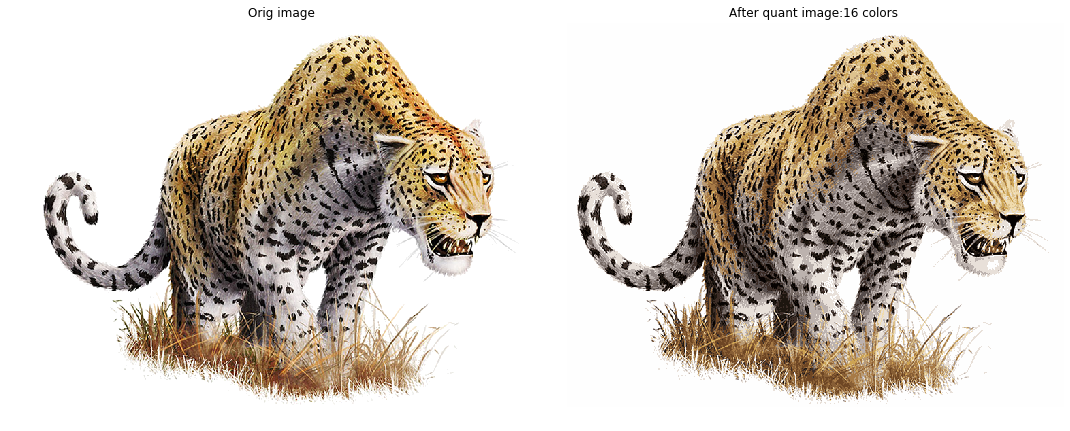

In [193]:
num_vq = 16

image = np.array(im).astype(np.float) / 255
image = image [:,:,: 3] 
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)


N = image_v.shape [0] 
    
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]

model.fit(image_sample)
c = model.predict (image_v)

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title ('Orig image')
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title ('After quant image:%d colors '% num_vq)
plt.imshow(vq_image)
plt.tight_layout(1.2)
plt.show()

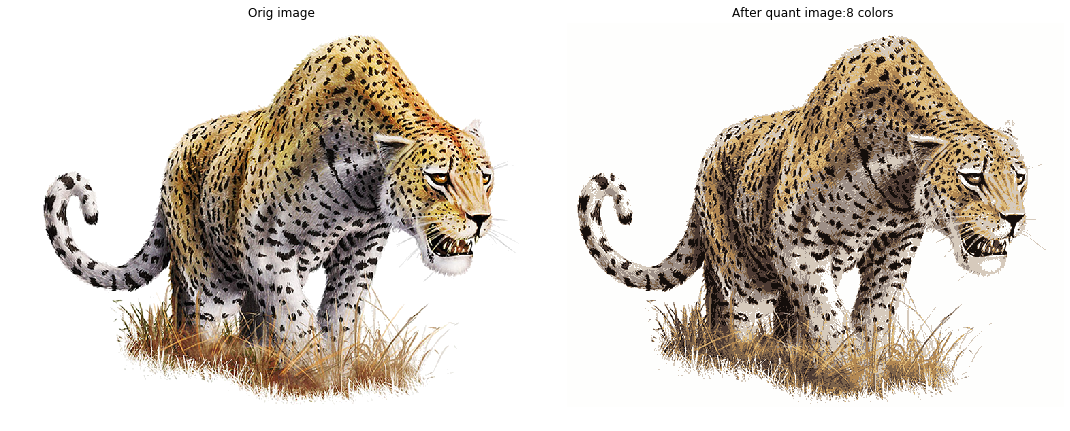

In [194]:
num_vq = 8

image = np.array(im).astype(np.float) / 255
image = image [:,:,: 3] 
image_v = image.reshape((-1, 3))
model = KMeans(num_vq)


N = image_v.shape [0] 
    
idx = np.random.randint(0, N, size=1000)
image_sample = image_v[idx]

model.fit(image_sample)
c = model.predict (image_v)

plt.figure(figsize=(15, 8), facecolor='w')
plt.subplot(121)
plt.axis('off')
plt.title ('Orig image')
plt.imshow(image)

plt.subplot(122)
vq_image = restore_image(model.cluster_centers_, c, image.shape)
plt.axis('off')
plt.title ('After quant image:%d colors '% num_vq)
plt.imshow(vq_image)
plt.tight_layout(1.2)
plt.show()

# Текстові дані

In [188]:
from sklearn.feature_extraction.text  import CountVectorizer
from sklearn.feature_extraction.text  import TfidfTransformer
from sklearn.naive_bayes              import MultinomialNB
from wordcloud                        import WordCloud,STOPWORDS

import string
import re

In [116]:
file_path = 'TheSocialDilemma.csv'
data = pd.read_csv(file_path)
data = data[['text', 'Sentiment']]
def clean_text(text):
  text = text.lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('\n', '', text)
  text = " ".join(filter(lambda x:x[0]!="@", text.split()))
  return text

data['clean text'] = data['text'].apply(lambda x: clean_text(x))


data['no punkt'] = data['clean text'].apply(lambda x: "".join([i for i in x if i not in string.punctuation]))

data['separated'] = data['no punkt'].apply(lambda x: word_tokenize(x))

data['no_stops']= data['separated'].apply(lambda x: [i for i in x if i not in STOPWORDS])
data['result'] = data['no_stops'].apply(lambda x: " ".join([i for i in x]))
data.head()

,text,Sentiment,clean text,no punkt,separated,no_stops,result
0,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral,i'm also reminded of the very poignant quote b...,im also reminded of the very poignant quote by...,"[im, also, reminded, of, the, very, poignant, ...","[im, reminded, poignant, quote, french, philos...",im reminded poignant quote french philosopher…
1,@musicmadmarc @SocialDilemma_ @netflix @Facebo...,Neutral,"haa, hey marc. i get what you're saying &amp; ...",haa hey marc i get what youre saying amp dont ...,"[haa, hey, marc, i, get, what, youre, saying, ...","[haa, hey, marc, youre, saying, amp, dont, agr...",haa hey marc youre saying amp dont agree 🤪whic...
2,Go watch “The Social Dilemma” on Netflix!\n\nI...,Positive,go watch “the social dilemma” on netflix!it’s ...,go watch “the social dilemma” on netflixit’s t...,"[go, watch, “, the, social, dilemma, ”, on, ne...","[go, watch, “, social, dilemma, ”, netflixit, ...",go watch “ social dilemma ” netflixit ’ s best...
3,I watched #TheSocialDilemma last night. I’m sc...,Negative,i watched #thesocialdilemma last night. i’m sc...,i watched thesocialdilemma last night i’m scar...,"[i, watched, thesocialdilemma, last, night, i,...","[watched, thesocialdilemma, last, night, ’, m,...",watched thesocialdilemma last night ’ m scared...
4,The problem of me being on my phone most the t...,Positive,the problem of me being on my phone most the t...,the problem of me being on my phone most the t...,"[the, problem, of, me, being, on, my, phone, m...","[problem, phone, time, trying, watch, thesocia...",problem phone time trying watch thesocialdilem...


In [127]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = data['result']
y = data['Sentiment'].map({'Negative':0, 'Neutral':1, 'Positive':2})

data['Label'] = data['Sentiment'].map({'Negative':0, 'Neutral':1, 'Positive':2})
train_size = int(len(data)*0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

In [155]:
tfidf_vectorizer = TfidfVectorizer()

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

In [148]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import preprocessing
from tensorflow.keras import callbacks
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

vocab_size = 8000
embedding_dim = 32
max_length = 90
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(X_train)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='pre', truncating='pre')
test_sequences = tokenizer.texts_to_sequences(X_test)
test_padded = pad_sequences(test_sequences, maxlen=max_length, padding='pre', truncating='pre')
model = Sequential([tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
                    tf.keras.layers.LSTM(100),
                    tf.keras.layers.Dense(max_length/2, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
                    tf.keras.layers.Dropout(0.4),
                    tf.keras.layers.Dense(3, activation='softmax')
])
model.summary()

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    0.01,
    decay_steps=10000,
    decay_rate=0.95,
    staircase=True
)

model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate = lr_schedule),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_padded, y_train, epochs=10, validation_data=(test_padded, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 90, 32)            256000    
                                                                 
 lstm_3 (LSTM)               (None, 100)               53200     
                                                                 
 dense_4 (Dense)             (None, 45)                4545      
                                                                 
 dropout_2 (Dropout)         (None, 45)                0         
                                                                 
 dense_5 (Dense)             (None, 3)                 138       
                                                                 
Total params: 313,883
Trainable params: 313,883
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
502/502 [============================

In [145]:
def worldcl(label):
    res = ''
    for item in data[data['Label'] == label]['result']:
        res += item
    wordcloud = WordCloud(width=1500, height=1200, background_color="black").generate(res)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

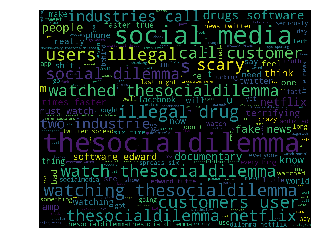

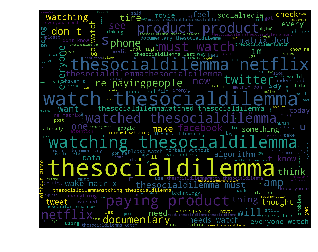

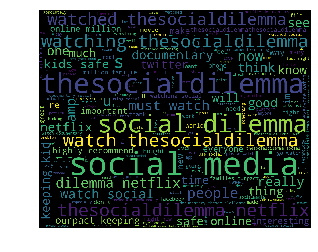

In [146]:
worldcl(0)
worldcl(1)
worldcl(2)

In [160]:
from sklearn.decomposition import LatentDirichletAllocation

n_components = 3

vectorizer = CountVectorizer(stop_words='english')

data_vectorized = vectorizer.fit_transform(X)

lda = LatentDirichletAllocation(n_components=n_components, random_state=0)

lda.fit(data_vectorized)

feature_names = vectorizer.get_feature_names_out()